# Model VECM (package [`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import VECM
from statsmodels.tsa.vector_ar.vecm import coint_johansen, select_coint_rank, select_order

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

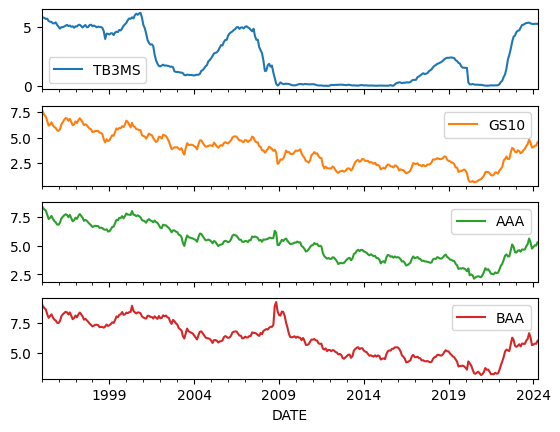

In [2]:
y = web.DataReader(name=['TB3MS', 'GS10', 'AAA', 'BAA'], data_source='fred', start='1995-01-01')

y.plot(subplots=True)
plt.show()

## Cointegration test

We call [coint_johansen(endog, det_order, k_ar_diff)](https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.vecm.coint_johansen.html#statsmodels.tsa.vector_ar.vecm.coint_johansen)

where 
* `det_order`
	* -1 - no deterministic terms
	* 0 - constant term
	* 1 - linear trend
* `k_ar_diff`: Number of lagged differences in the model

In [ ]:
# Johansen test
coint_res = coint_johansen(y, det_order=0, k_ar_diff=2)

In [4]:
# trace-stat & critical
coint_res.trace_stat, coint_res.trace_stat_crit_vals

(array([58.98756114, 29.29712051, 11.44197894,  4.14983581]),
 array([[44.4929, 47.8545, 54.6815],
        [27.0669, 29.7961, 35.4628],
        [13.4294, 15.4943, 19.9349],
        [ 2.7055,  3.8415,  6.6349]]))

In [5]:
# eigenvalue-stat & critical
coint_res.max_eig_stat, coint_res.max_eig_stat_crit_vals

(array([29.69044063, 17.85514157,  7.29214312,  4.14983581]),
 array([[25.1236, 27.5858, 32.7172],
        [18.8928, 21.1314, 25.865 ],
        [12.2971, 14.2639, 18.52  ],
        [ 2.7055,  3.8415,  6.6349]]))

We call [`select_coint_rank(endog, det_order, k_ar_diff, method='trace', signif=0.05)`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.vecm.select_coint_rank.html#statsmodels.tsa.vector_ar.vecm.select_coint_rank)

where 
* `det_order`
	* -1 - no deterministic terms
	* 0 - constant term
	* 1 - linear trend
* `k_ar_diff` - Number of lagged differences in the model
* `method` - test statistics: `trace` or `maxeig`
* `signif` is significant level: 0.1, 0.05, 0.01

In [ ]:
# select cointegration rank
select_coint_rank(y, det_order=0, k_ar_diff=2, method='trace', signif=0.05).summary()

r_0,r_1,test statistic,critical value
0,4,58.99,47.85
1,4,29.30,29.80


## Fitting VECM

For automatic lag selection we call [`select_order(data, maxlags, deterministic='n')`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.vecm.select_order.html#statsmodels.tsa.vector_ar.vecm.select_order)

where `deterministic` 
* "n" - no deterministic terms
* "co" - constant outside the cointegration relation
* "ci" - constant within the cointegration relation
* "lo" - linear trend outside the cointegration relation
* "li" - linear trend within the cointegration relation

Combinations of these are possible (e.g. "cili" or "colo" for linear trend with intercept)

In [ ]:
# number or lags selection for VECM
select_order(y, maxlags=2, deterministic='c').summary()

,AIC,BIC,FPE,HQIC
0,-15.69,-15.47,1.533e-07,-15.60
1,-16.29,-15.89*,8.447e-08,-16.13*
2,-16.29*,-15.72,8.423e-08*,-16.06


For the fitting of the model of given oder we call [VECM](https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.vecm.VECM.html#statsmodels.tsa.vector_ar.vecm.VECM)

здесь `deterministic` 
* "n" - no deterministic terms
* "co" - constant outside the cointegration relation
* "ci" - constant within the cointegration relation
* "lo" - linear trend outside the cointegration relation
* "li" - linear trend within the cointegration relation

Combinations of these are possible (e.g. "cili" or "colo" for linear trend with intercept)

In [8]:
mod = VECM(y, k_ar_diff=1, coint_rank=1, deterministic='co', missing='drop')

res = mod.fit()

res.summary(alpha=0.05)

,coef,std err,z,P>|z|,[0.025,0.975]
const,0.1097,0.036,3.016,0.003,0.038,0.181
L1.TB3MS,0.3994,0.055,7.320,0.000,0.292,0.506
L1.GS10,0.0612,0.077,0.794,0.427,-0.090,0.212
L1.AAA,-0.0602,0.124,-0.487,0.627,-0.303,0.182
L1.BAA,0.0369,0.081,0.455,0.649,-0.122,0.196
,coef,std err,z,P>|z|,[0.025,0.975]
const,-0.0763,0.047,-1.612,0.107,-0.169,0.016
L1.TB3MS,0.0126,0.071,0.177,0.860,-0.127,0.152
L1.GS10,0.1954,0.100,1.948,0.051,-0.001,0.392
L1.AAA,0.2916,0.161,1.810,0.070,-0.024,0.607


## Model diagnostic

In [ ]:
# serial correlation test
res.test_whiteness(nlags=10, signif=0.05, adjusted=True).summary()

Test statistic,Critical value,p-value,df
220.2,168.6,0.000,140


## Forecasting

In [ ]:
# we transform y into numpy array
res.predict(steps=10)

array([[5.2639138 , 4.61473563, 5.32326219, 6.0468162 ],
       [5.29134772, 4.61676503, 5.32380167, 6.0494271 ],
       [5.3162828 , 4.60225929, 5.31814477, 6.04887649],
       [5.33796982, 4.58434517, 5.31075221, 6.04932237],
       [5.3566754 , 4.56603278, 5.30225787, 6.04954863],
       [5.37272702, 4.5482922 , 5.29318933, 6.0488948 ],
       [5.38642122, 4.53151366, 5.28393449, 6.04727606],
       [5.39803484, 4.51580591, 5.27469009, 6.04478207],
       [5.40782552, 4.50113565, 5.26553201, 6.04152355],
       [5.41602735, 4.48741141, 5.25648043, 6.03760067]])

Visualization

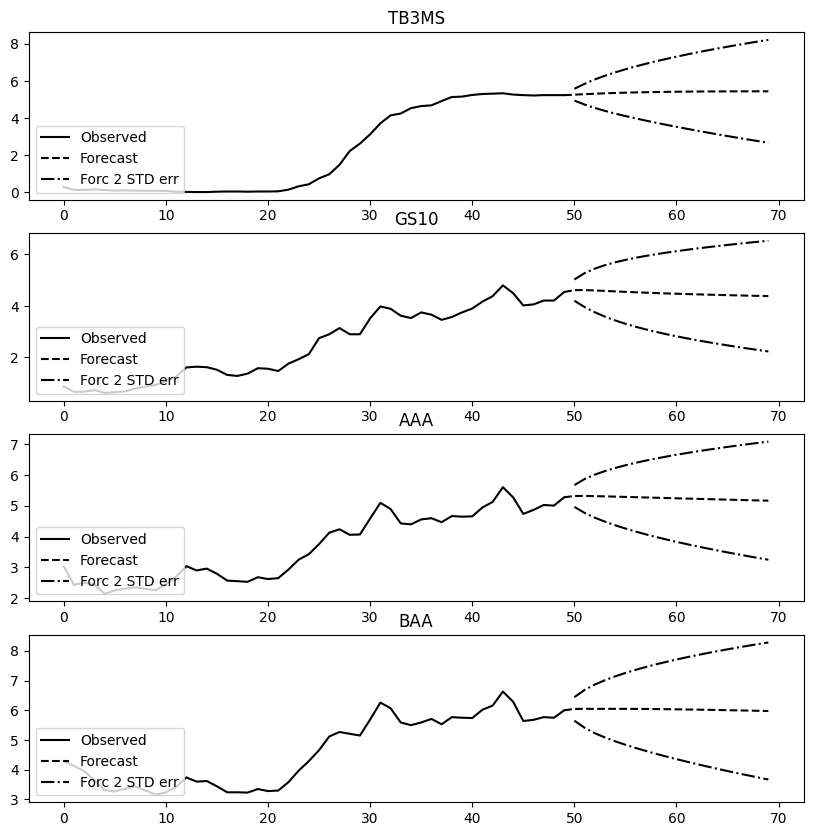

In [11]:
fig = res.plot_forecast(steps=20, alpha=0.05, plot_conf_int=True, n_last_obs=50)

# изменим положение легенды для каждого подграфика
# for i in range(y.shape[1]):
# 	fig.axes[i].legend(loc=3)

plt.show()

## IRF

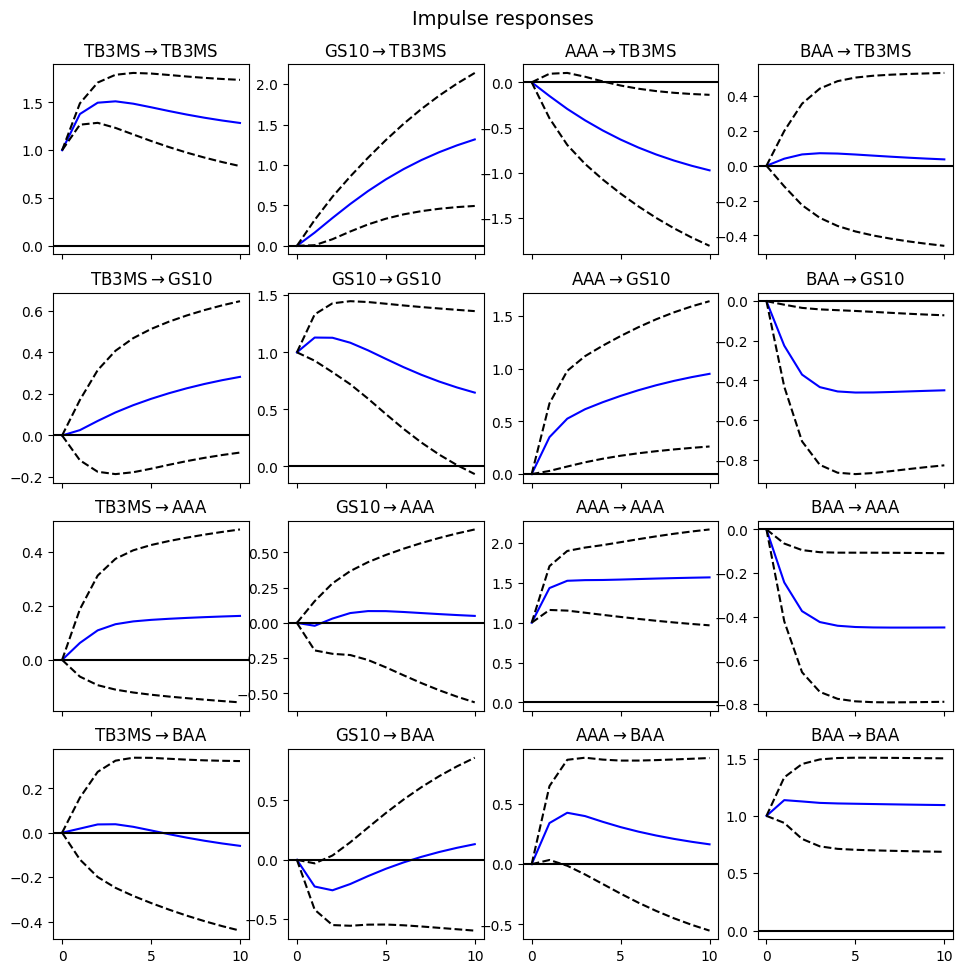

In [12]:
res.irf(periods=10).plot(signif=0.05)
plt.show()

## Causality test

In [13]:
res.test_granger_causality(caused=['AAA', 'BAA'], causing=['TB3MS', 'GS10'], signif=0.01).summary()

Test statistic,Critical value,p-value,df
5.166,2.524,0.000,"(8, 1344)"


In [14]:
res.test_granger_causality(caused= ['TB3MS', 'GS10'], causing=['AAA', 'BAA'], signif=0.01).summary()

Test statistic,Critical value,p-value,df
2.503,2.524,0.011,"(8, 1344)"
